# **Importing Libraries**

Importing libraries in Python enables access to pre-written functions, classes, and modules, which streamline tasks like data manipulation, visualization, and machine learning, allowing for efficient and organized coding.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, classification_report, ConfusionMatrixDisplay
)

# **Read Data**

First let's read datas and take a look at the data we have

In [3]:
# Importing the the dataset
dataset = pd.read_csv("data.csv")

In [4]:
# Display the first few rows of the dataset
dataset.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [6]:
# Check for missing values
missing_values = dataset.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


We can see that both data sets have not null value.

# **Encoding Categorical Variables**

In machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. To make the data understandable or in human readable form, the training data is often labeled in words. Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form.

Label Encoding: Encoded values for `Gender`, `Vehicle_Age`, and `Vehicle_Damage` with label encoding.


In [7]:
df = dataset.copy()
# drop ID column
df= df.drop('id',axis=1)

# binary encoding
df['Gender'] =df['Gender'].replace({'Male':1,'Female':0})
df['Vehicle_Damage'] =df['Vehicle_Damage'].replace({'Yes':1,'No':0})
df['Vehicle_Age'] =  df['Vehicle_Age'].replace({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})

# for column in ['Region_Code','Vehicle_Age'
df['Vintage'] = df['Vintage'].astype('category').cat.codes
df['Region_Code'] = df['Region_Code'].astype('category').cat.codes
df['Policy_Sales_Channel'] = df['Policy_Sales_Channel'].astype('category').cat.codes


<ipython-input-7-0880f4e04bd2>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] =df['Gender'].replace({'Male':1,'Female':0})
<ipython-input-7-0880f4e04bd2>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Vehicle_Damage'] =df['Vehicle_Damage'].replace({'Yes':1,'No':0})
<ipython-input-7-0880f4e04bd2>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavio

# **Correlation**

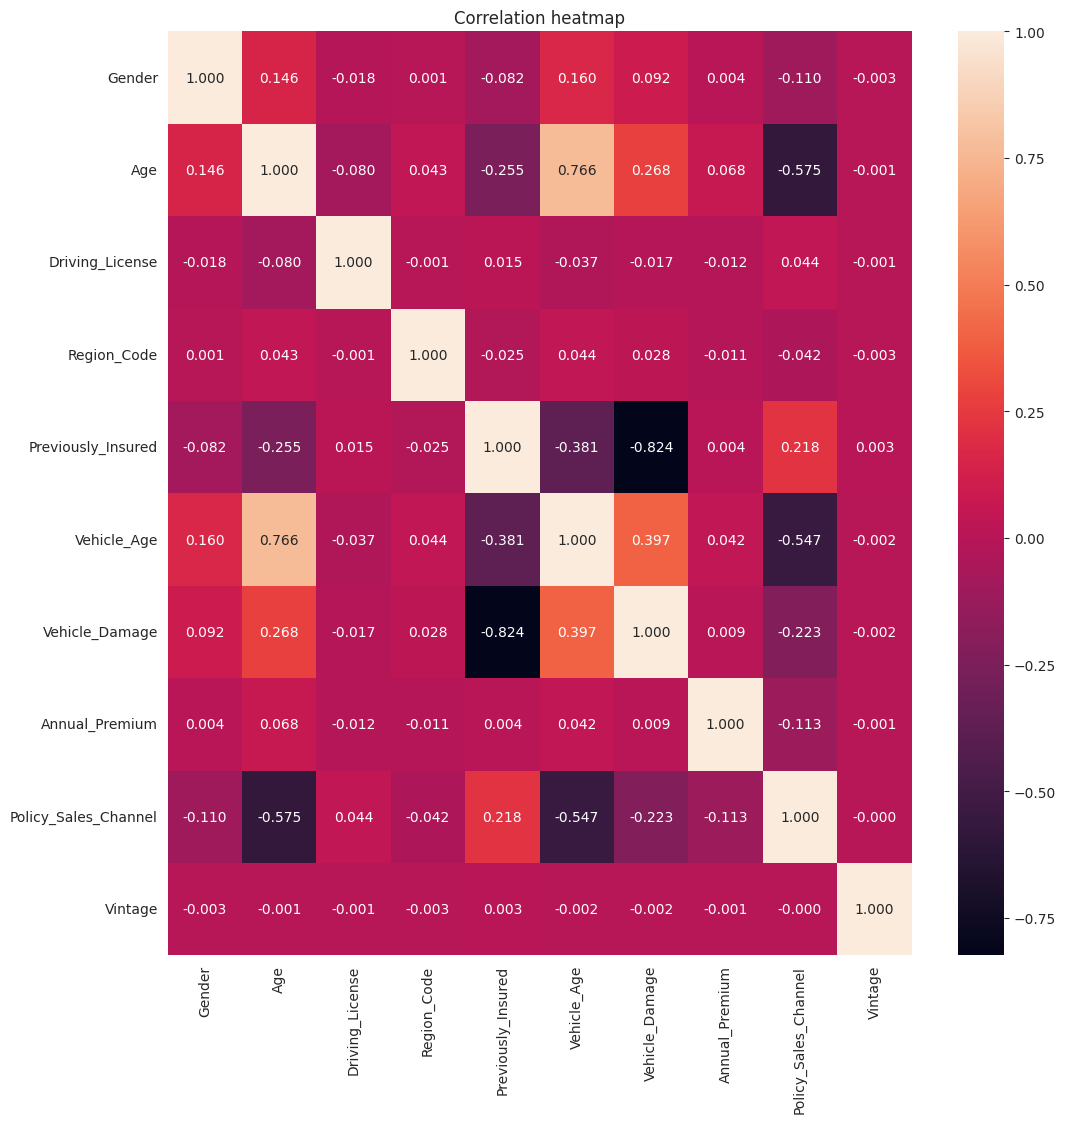

In [49]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True, fmt=".3f")
plt.title('Correlation heatmap')
plt.show()

We can see that the most influencing factors for Response are Vehicle_Damage and Previously_Insured, followed by Vehicle_Age and Policy_Sales_Channel.

# **Visualization Of Our Data Set**

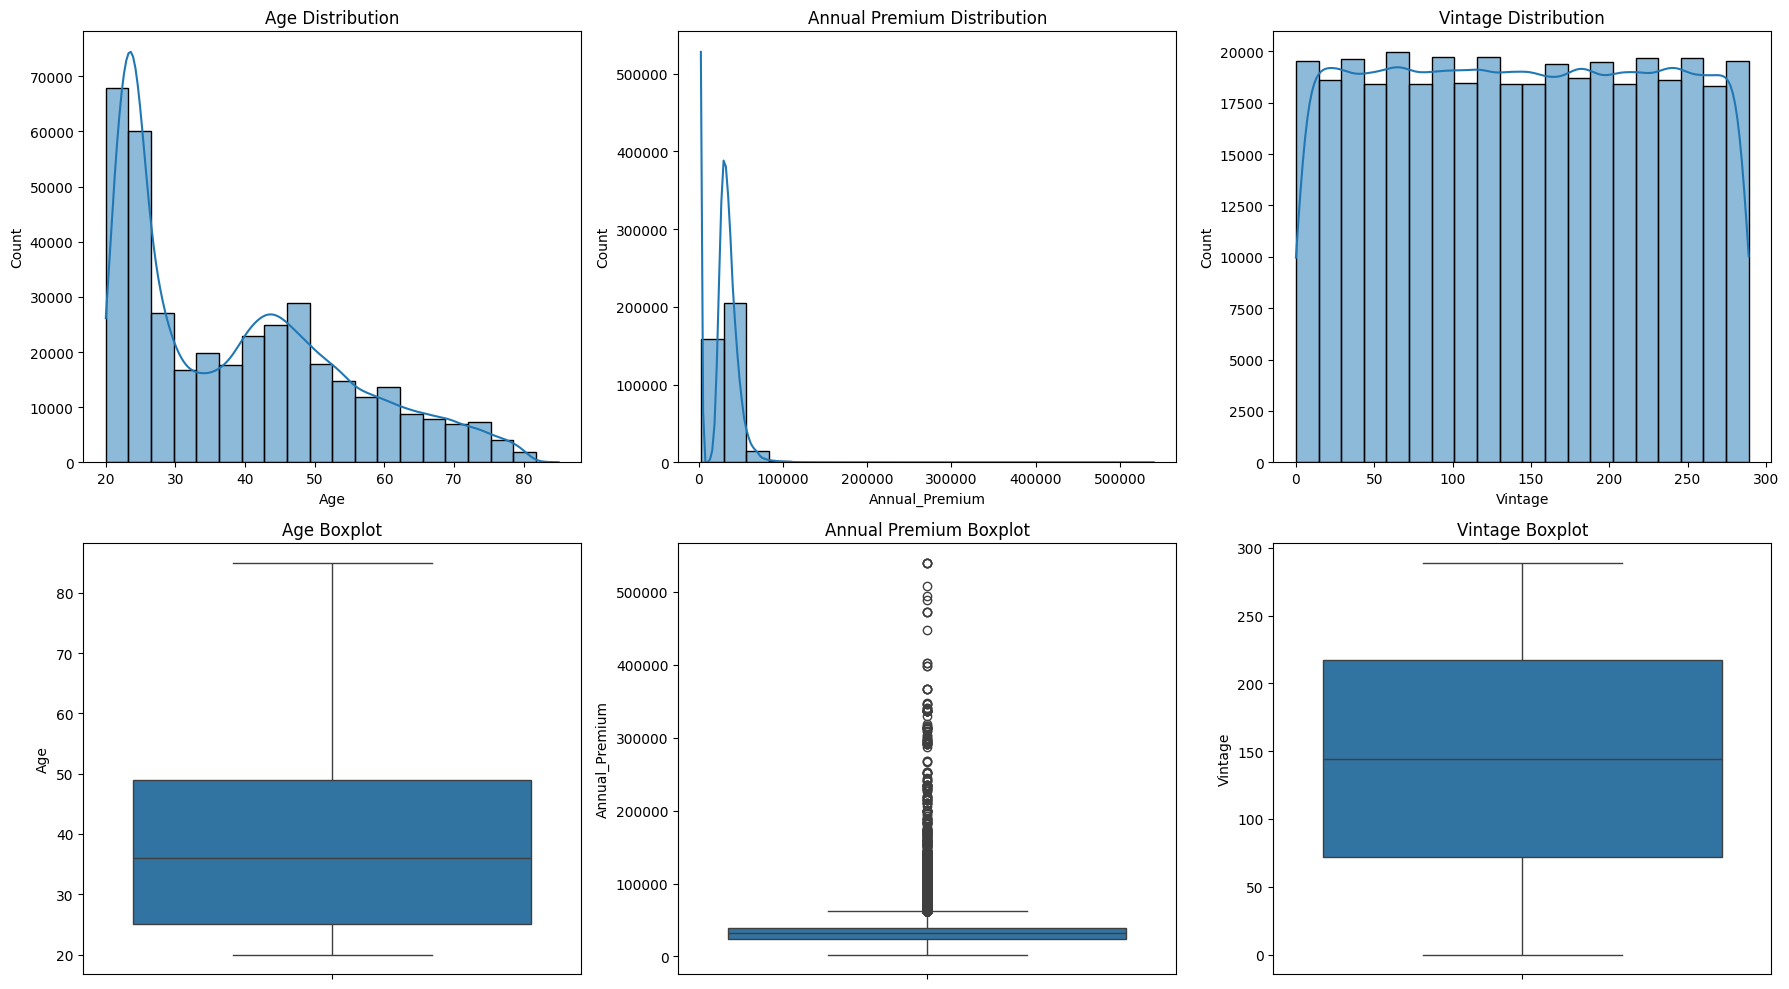

In [9]:
# Set up the figure for subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Plot histograms for Age, Annual Premium, and Vintage
sns.histplot(df['Age'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.histplot(df['Annual_Premium'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Annual Premium Distribution')

sns.histplot(df['Vintage'], bins=20, kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Vintage Distribution')

# Plot boxplots for Age, Annual Premium, and Vintage
sns.boxplot(y=df['Age'], ax=axes[1, 0])
axes[1, 0].set_title('Age Boxplot')

sns.boxplot(y=df['Annual_Premium'], ax=axes[1, 1])
axes[1, 1].set_title('Annual Premium Boxplot')

sns.boxplot(y=df['Vintage'], ax=axes[1, 2])
axes[1, 2].set_title('Vintage Boxplot')

plt.tight_layout()
plt.show()


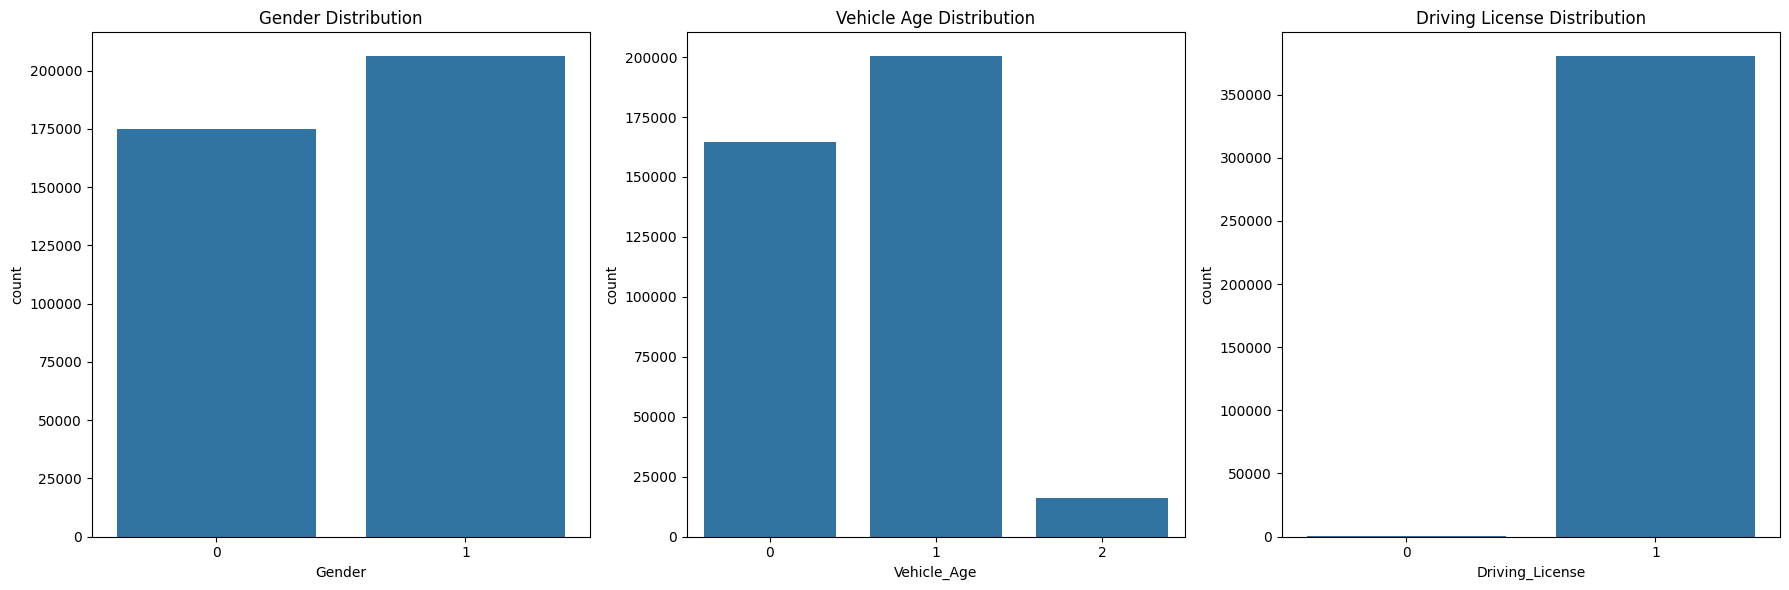

In [10]:
# Setting up the figure for subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plotting bar plots for Gender, Vehicle Age, and Driving License
sns.countplot(x='Gender', data=df, ax=axes[0])
axes[0].set_title('Gender Distribution')

sns.countplot(x='Vehicle_Age', data=df, ax=axes[1])
axes[1].set_title('Vehicle Age Distribution')

sns.countplot(x='Driving_License', data=df, ax=axes[2])
axes[2].set_title('Driving License Distribution')

plt.tight_layout()
plt.show()


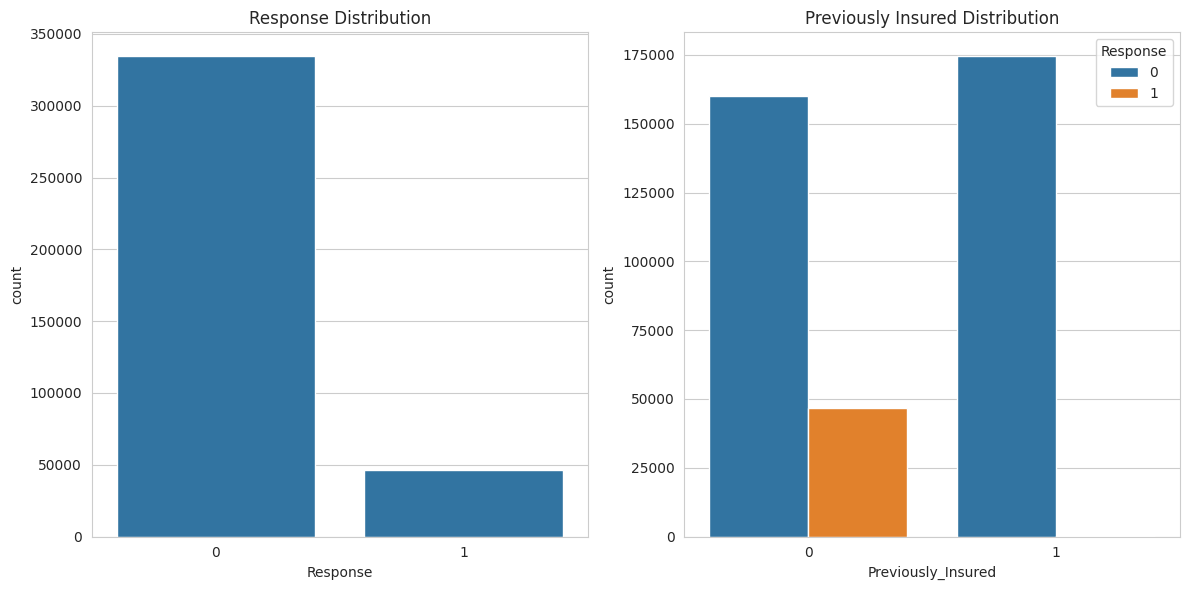

In [52]:
# Setting up the figure for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting bar plots for Gender, Vehicle Age, and Driving License

sns.countplot(x='Response',data=dataset, ax=axes[0])
axes[0].set_title('Response Distribution')


sns.countplot(x='Previously_Insured',hue='Response',data=dataset, ax=axes[1])
axes[1].set_title('Previously Insured Distribution')


plt.tight_layout()
plt.show()

# **Splitting dataset into X and y**

In [13]:
 #Split df into X and y
y=df['Response']
df.drop('Response', axis=1,inplace=True)
X=df

In [14]:
X.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,44,1,28,0,2,1,40454.0,24,207
1,1,76,1,3,0,1,0,33536.0,24,173
2,1,47,1,28,0,2,1,38294.0,24,17
3,1,21,1,11,1,0,0,28619.0,145,193
4,0,29,1,41,1,0,0,27496.0,145,29


In [15]:
y.head()

,Response
0,1
1,0
2,1
3,0
4,0


# **Splitting Data into Training and Test Sets**

Divided the dataset into training and test sets to evaluate model performance on unseen data.
Applied a 80-20 split to allow sufficient data for both model training and validation.

In [16]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,shuffle=True, random_state=42)


# **Checking count of Dependent variables in training data**

In [17]:
y_train.value_counts()

,count
Response,
0,267700
1,37187


# **Handling Class Imbalance with SMOTE**

Applied Synthetic Minority Over-sampling Technique (SMOTE) to balance the classes in the target variable.
SMOTE generated synthetic samples for the minority class, ensuring the model is not biased toward the majority class.


In [18]:
sm = SMOTE(random_state=12, )
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [19]:
y_train_res.value_counts()

,count
Response,
1,267700
0,267700


In [20]:
sm = SMOTE(random_state=42, )
X_test_res, y_test_res = sm.fit_resample(X_test, y_test)

In [21]:
y_test_res.value_counts()

,count
Response,
0,66699
1,66699


# **Feature Scaling**

Used StandardScaler to normalize numerical columns (`Age`, `Annual_Premium`, and `Vintage`).
Ensured all numeric features have a mean of 0 and standard deviation of 1, which helps with model convergence and improves Logistic Regression performance.

In [22]:
scaler = StandardScaler()
X_train[['Age', 'Annual_Premium', 'Vintage']] = scaler.fit_transform(X_train[['Age', 'Annual_Premium', 'Vintage']])
X_test[['Age', 'Annual_Premium', 'Vintage']] = scaler.transform(X_test[['Age', 'Annual_Premium', 'Vintage']])

X_train_res[['Age', 'Annual_Premium', 'Vintage']] = scaler.fit_transform(X_train_res[['Age', 'Annual_Premium', 'Vintage']])
X_test_res[['Age', 'Annual_Premium', 'Vintage']] = scaler.transform(X_test_res[['Age', 'Annual_Premium', 'Vintage']])

Checking data after scaling

In [23]:
X_train_res.head()


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,0,-0.114641,1,15,0,1,1,1.221995,53,0.878904
1,1,-0.187385,1,11,0,1,1,-0.445746,24,-1.504493
2,1,-1.351280,1,30,1,0,0,0.798303,145,0.144625
3,0,-1.278537,1,41,1,0,0,-0.105475,144,1.480772
4,1,1.121997,1,48,0,2,1,-1.585268,147,0.012214


# **LogisticRegression without hyperparameter tuning**

In [24]:
model=LogisticRegression()
model.fit(X_train_res,y_train_res)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# **Let's check the accuracy of the model.**

Test Accuracy : 77.71%


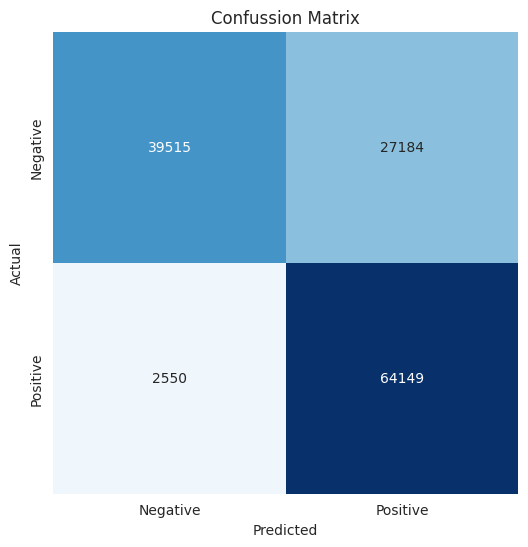

In [25]:
acc= model.score(X_test_res,y_test_res)
y_pred=model.predict(X_test_res)

print("Test Accuracy : {:.2f}%".format(acc*100))


cm=confusion_matrix(y_test_res,y_pred, labels=[0,1])
clr=classification_report(y_test_res,y_pred, labels=[0,1],target_names=['Negative','Positive'])

plt.figure(figsize=(6,6))
sns.heatmap(cm,annot=True,fmt='g',vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.yticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confussion Matrix')
plt.show()



In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Calculate and print evaluation metrics
print("Test Accuracy:", accuracy_score(y_test_res, y_pred))
print("Test Precision:", precision_score(y_test_res, y_pred))
print("Test Recall:", recall_score(y_test_res, y_pred))
print("Test F1-Score:", f1_score(y_test_res, y_pred))
print("Test ROC-AUC:", roc_auc_score(y_test_res, y_pred))
print("\nClassification Report:\n", classification_report(y_test_res, y_pred))


Test Accuracy: 0.7771031049940779
Test Precision: 0.7023638772404279
Test Recall: 0.9617685422570054
Test F1-Score: 0.8118482332692113
Test ROC-AUC: 0.777103104994078

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.59      0.73     66699
           1       0.70      0.96      0.81     66699

    accuracy                           0.78    133398
   macro avg       0.82      0.78      0.77    133398
weighted avg       0.82      0.78      0.77    133398



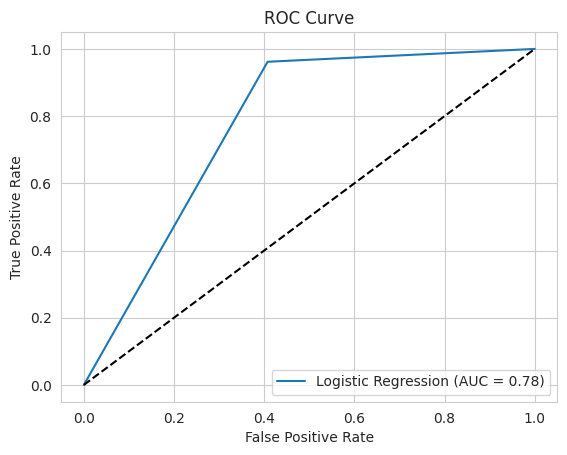

In [27]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test_res, y_pred)
plt.plot(fpr, tpr, label="Logistic Regression (AUC = {:.2f})".format(roc_auc_score(y_test_res, y_pred)))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


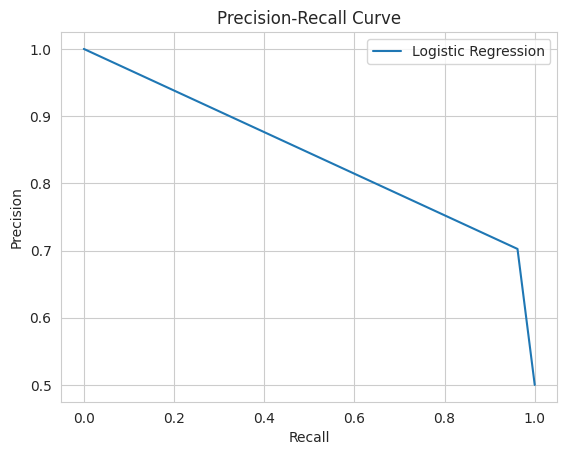

In [28]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test_res, y_pred)
plt.plot(recall, precision, label="Logistic Regression")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


# **LogisticRegression with hyperparameter tuning**

In [29]:
# Define hyperparameter grid for RandomizedSearchCV
param_distributions_logistic = {
    'penalty': ['l2'],
    'C': np.logspace(-3, 3, 7),
    'solver': ['liblinear', 'saga']
}

# Initialize RandomizedSearchCV
random_search_logistic = RandomizedSearchCV(
    LogisticRegression(random_state=42, max_iter=1000),
    param_distributions_logistic,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit to the SMOTE-resampled training data
random_search_logistic.fit(X_train_res,y_train_res)

# Best model
best_logistic = random_search_logistic.best_estimator_


Fitting 5 folds for each of 10 candidates, totalling 50 fits


# **Let's check the accuracy of the model.**

test accuracy:77.70%


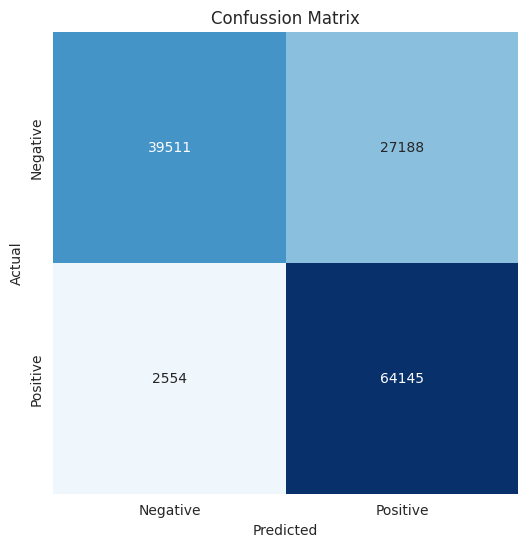

In [30]:
# Predictions and probabilities
y_pred_logistic = best_logistic.predict(X_test_res)
y_pred_proba_logistic = best_logistic.predict_proba(X_test_res)[:, 1]

# Evaluation metrics
acc=random_search_logistic.score(X_test_res, y_test_res)
print("test accuracy:{:.2f}%".format(acc*100))


# Confusion Matrix

cm=confusion_matrix(y_test_res,y_pred_logistic, labels=[0,1])

plt.figure(figsize=(6,6))
plt.title("Confusion Matrix for Decision Tree Classifier")
sns.heatmap(cm,annot=True,fmt='g',vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.yticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confussion Matrix')
plt.show()

In [31]:
print("Logistic Regression:")
print(f"Best Parameters: {random_search_logistic.best_params_}")
print(f"Accuracy: {accuracy_score(y_test_res, y_pred_logistic):.4f}")
print("Classification Report:\n", classification_report(y_test_res, y_pred_logistic))

Logistic Regression:
Best Parameters: {'solver': 'saga', 'penalty': 'l2', 'C': 0.001}
Accuracy: 0.7770
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.59      0.73     66699
           1       0.70      0.96      0.81     66699

    accuracy                           0.78    133398
   macro avg       0.82      0.78      0.77    133398
weighted avg       0.82      0.78      0.77    133398



In [32]:
# Precision, Recall, F1 Score, and ROC-AUC
precision = precision_score(y_test_res, y_pred_logistic)
recall = recall_score(y_test_res, y_pred_logistic)
f1 = f1_score(y_test_res, y_pred_logistic)
roc_auc = roc_auc_score(y_test_res, y_pred_proba_logistic)
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, ROC-AUC: {roc_auc:.4f}")

Precision: 0.7023, Recall: 0.9617, F1 Score: 0.8118, ROC-AUC: 0.8357


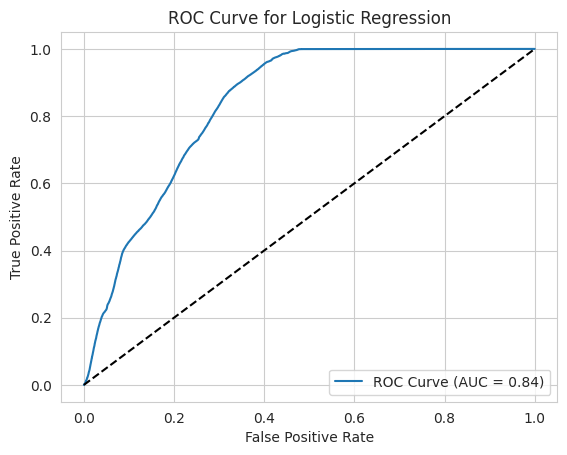

In [33]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test_res, y_pred_proba_logistic)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend()
plt.show()

# **DecisionTreeClassifier**

# **DecisionTreeClassifier withou hyperparameter tuning**

In [34]:
#Creating a Model
tree_classifier = DecisionTreeClassifier()
#Building a relationship by looking at x_train and y_train data
tree_classifier.fit(X_train_res,y_train_res)

DecisionTreeClassifier()

# **Let's check the accuracy of the model.**

Test Accuracy : 77.71%


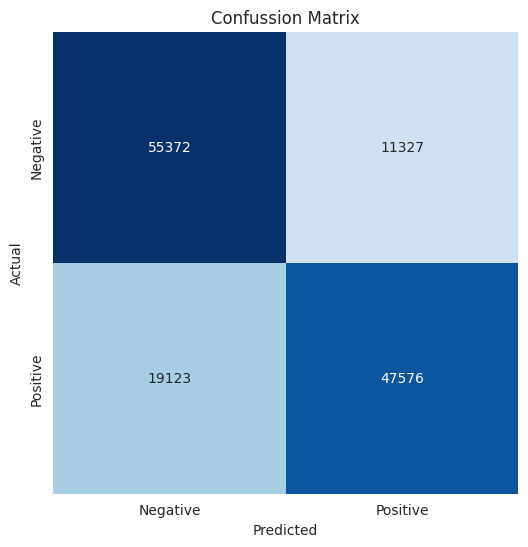

Classification Report: 
--------------------------------------------------------
               precision    recall  f1-score   support

    Negative       0.74      0.83      0.78     66699
    Positive       0.81      0.71      0.76     66699

    accuracy                           0.77    133398
   macro avg       0.78      0.77      0.77    133398
weighted avg       0.78      0.77      0.77    133398



In [35]:
# plot_confusion_matrix(tree_classifier,X_test, y_test)
acc= model.score(X_test_res,y_test_res)
prediction=tree_classifier.predict(X_test_res)
print("Test Accuracy : {:.2f}%".format(acc*100))

cm=confusion_matrix(y_test_res,prediction, labels=[0,1])
clr=classification_report(y_test_res,prediction, labels=[0,1],target_names=['Negative','Positive'])

plt.figure(figsize=(6,6))
sns.heatmap(cm,annot=True,fmt='g',vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.yticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confussion Matrix')
plt.show()

print("Classification Report: \n--------------------------------------------------------\n",clr)

# **DecisionTreeClassifier with hyperparameter tuning**

In [36]:
# Define hyperparameter grid for RandomizedSearchCV
param_distributions_tree = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize RandomizedSearchCV
random_search_tree = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions_tree,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit to the SMOTE-resampled training data
random_search_tree.fit(X_train_res, y_train_res)

# Best model
best_tree = random_search_tree.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


# **Let's check the accuracy of the model.**

test accuracy:77.15%


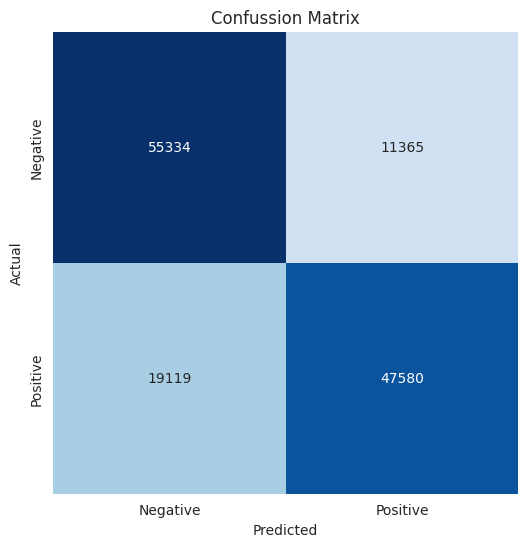

Decision Tree Classifier:
Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'gini'}
Accuracy: 0.7715
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.83      0.78     66699
           1       0.81      0.71      0.76     66699

    accuracy                           0.77    133398
   macro avg       0.78      0.77      0.77    133398
weighted avg       0.78      0.77      0.77    133398



In [37]:
# Predictions
y_pred_tree = best_tree.predict(X_test_res)

# Evaluation metrics
acc=random_search_tree.score(X_test_res, y_test_res)
print("test accuracy:{:.2f}%".format(acc*100))

# Confusion Matrix


cm=confusion_matrix(y_test_res,y_pred_tree, labels=[0,1])

plt.figure(figsize=(6,6))
plt.title("Confusion Matrix for Decision Tree Classifier")
sns.heatmap(cm,annot=True,fmt='g',vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.yticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confussion Matrix')
plt.show()


print("Decision Tree Classifier:")
print(f"Best Parameters: {random_search_tree.best_params_}")
print(f"Accuracy: {accuracy_score(y_test_res, y_pred_tree):.4f}")
print("Classification Report:\n", classification_report(y_test_res, y_pred_tree))


In [38]:
# Precision, Recall, F1 Score
precision = precision_score(y_test_res, y_pred_tree)
recall = recall_score(y_test_res, y_pred_tree)
f1 = f1_score(y_test_res, y_pred_tree)
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

Precision: 0.8072, Recall: 0.7134, F1 Score: 0.7574


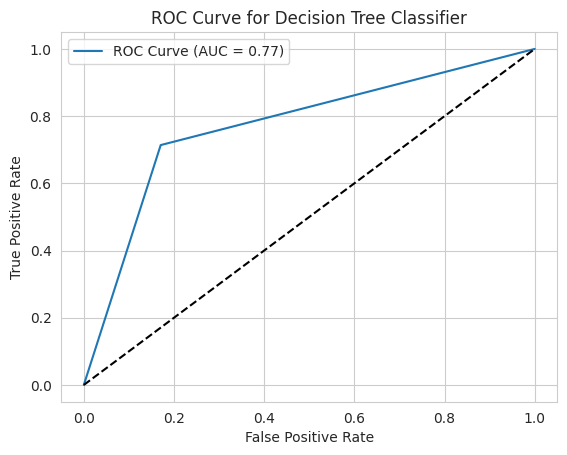

In [39]:
# ROC-AUC and ROC Curve
y_pred_proba_tree = best_tree.predict_proba(X_test_res)[:, 1]
roc_auc = roc_auc_score(y_test_res, y_pred_proba_tree)
fpr, tpr, _ = roc_curve(y_test_res, y_pred_proba_tree)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Decision Tree Classifier")
plt.legend()
plt.show()

# **RandomForestClassifier without hyperparameter tuning**

In [40]:
rf_classifier = RandomForestClassifier(random_state=1)
rf_classifier.fit(X_train_res,y_train_res)

RandomForestClassifier(random_state=1)

# **Let's check the accuracy of the model.**

Test Accuracy : 77.71%


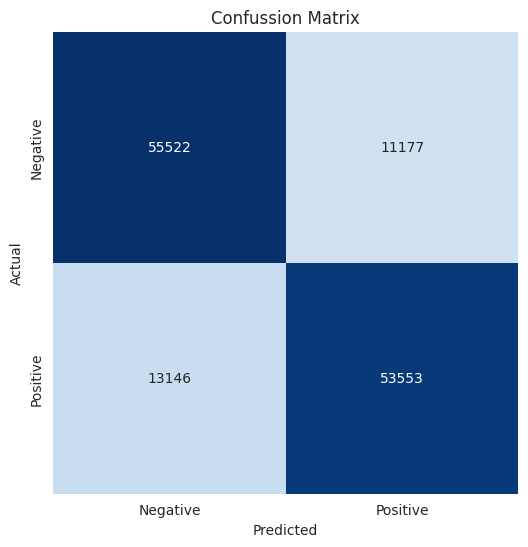

Classification Report: 
--------------------------------------------------------
               precision    recall  f1-score   support

    Negative       0.81      0.83      0.82     66699
    Positive       0.83      0.80      0.81     66699

    accuracy                           0.82    133398
   macro avg       0.82      0.82      0.82    133398
weighted avg       0.82      0.82      0.82    133398



In [41]:
# plot_confusion_matrix(tree_classifier,X_test, y_test_res)
acc= model.score(X_test_res,y_test_res)
rf_predictions=rf_classifier.predict(X_test_res)
print("Test Accuracy : {:.2f}%".format(acc*100))


cm=confusion_matrix(y_test_res,rf_predictions, labels=[0,1])
clr=classification_report(y_test_res,rf_predictions, labels=[0,1],target_names=['Negative','Positive'])

plt.figure(figsize=(6,6))
sns.heatmap(cm,annot=True,fmt='g',vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.yticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confussion Matrix')
plt.show()

print("Classification Report: \n--------------------------------------------------------\n",clr)

# **RandomForestClassifier with hyperparameter tuning**

In [42]:
# Define hyperparameter grid for RandomizedSearchCV
param_distributions_forest = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize RandomizedSearchCV
random_search_forest = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions_forest,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit to the SMOTE-resampled training data
random_search_forest.fit(X_train_res, y_train_res)

# Best model
best_forest = random_search_forest.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

# **Let's check the accuracy of the model.**

test accuracy:83.98%


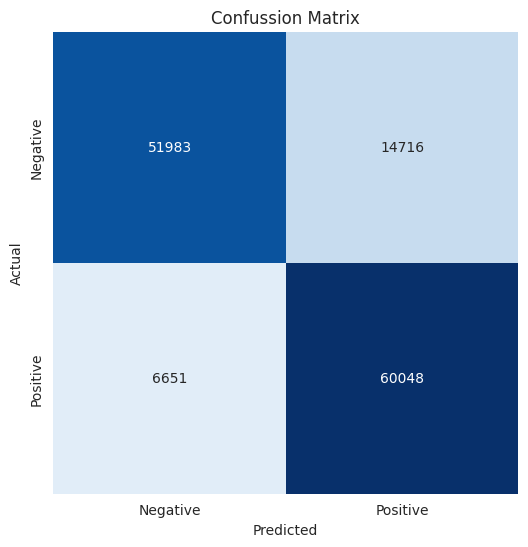

Random Forest Classifier:
Best Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
Accuracy: 0.8398
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.78      0.83     66699
           1       0.80      0.90      0.85     66699

    accuracy                           0.84    133398
   macro avg       0.84      0.84      0.84    133398
weighted avg       0.84      0.84      0.84    133398



In [45]:
# Predictions
y_pred_forest = best_forest.predict(X_test_res)

# Evaluation metrics
acc=random_search_forest.score(X_test_res, y_test_res)
print("test accuracy:{:.2f}%".format(acc*100))


# Confusion Matrix
cm=confusion_matrix(y_test_res,y_pred_forest, labels=[0,1])
clr=classification_report(y_test_res,y_pred_forest, labels=[0,1],target_names=['Negative','Positive'])
plt.figure(figsize=(6,6))
sns.heatmap(cm,annot=True,fmt='g',vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.yticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confussion Matrix')
plt.show()


print("Random Forest Classifier:")
print(f"Best Parameters: {random_search_forest.best_params_}")
print(f"Accuracy: {accuracy_score(y_test_res, y_pred_forest):.4f}")
print("Classification Report:\n", classification_report(y_test_res, y_pred_forest))



In [46]:
# Precision, Recall, F1 Score
precision = precision_score(y_test_res, y_pred_forest)
recall = recall_score(y_test_res, y_pred_forest)
f1 = f1_score(y_test_res, y_pred_forest)
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")



Precision: 0.8032, Recall: 0.9003, F1 Score: 0.8490


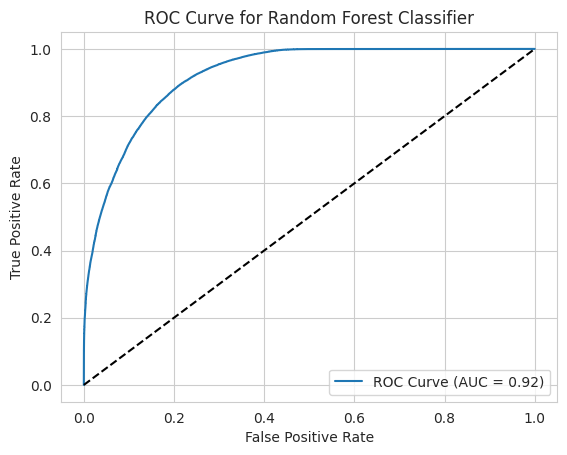

In [47]:
# ROC-AUC and ROC Curve
y_pred_proba_forest = best_forest.predict_proba(X_test_res)[:, 1]
roc_auc = roc_auc_score(y_test_res, y_pred_proba_forest)
fpr, tpr, _ = roc_curve(y_test_res, y_pred_proba_forest)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest Classifier")
plt.legend()
plt.show()